In [1]:
from nltk import word_tokenize

from bs4 import BeautifulSoup, SoupStrainer

import re
import requests

import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix

import pandas as pd

import seaborn as sn

import matplotlib
import matplotlib.pyplot as plt

### MacVittie - Homework 6
**1)** 1.	Evaluate text similarity of Amazon book search results by doing the following:

*a.*	Do a book search on Amazon. Manually copy the full book title (including subtitle) of each of the top 24 books listed in the first two pages of search results. 

```
The chosen term was "Epistemology."

There were a few things that clearly didn't belong - a t-shirt, for example - that I felt were prudent to skip,
and each page had only 21 entries, not 24. I continued through pages until I hit the presumed requisite of 48
entries.
```

*b.*	In Python, run one of the text-similarity measures covered in this course, e.g., cosine similarity. Compare each of the book titles, pairwise, to every other one. 

```
Done, consult the graph below.
```

*c.*	Which two titles are the most similar to each other? Which are the most dissimilar? Where do they rank, among the first 24 results?

```
Titles 4 and 14 are both literally 'Epistemology,' so that isn't surprising.

Titles 1 and 6 both contain the phrase 'Epistemology: A Contemporary Introduction,' with 6 having a bit of a more
drawn-out name.

Titles 6 and 23 both have the phrase 'Theory of Knowledge.'

Titles 5 and 47 both have the word 'Epistemology' and the phrase 'How we know.'

Many pairs of titles are quite dissimilar. 'Nothing & Everything' and 'Knowledge: A Very Short Introduction (Very 
Short Introductions),' for instance, have nothing in common, while being (ostensibly) about the same topic.

'Southeast Asia's Modern Architecture: Questions of Translation, Epistemology and Power' and 'Introduction to 
Objectivist Epistemology: Expanded Second Edition' have only the word 'Epistemology' in common, and nothing beyond
that. Given that the field has quite a range of topics, this isn't surprising.
```

**2)** Now evaluate using a major search engine.

*a.*	Enter one of the book titles from question 1a into Google, Bing, or Yahoo!. Copy the capsule of the first organic result and the 20th organic result. Take web results only (i.e., not video results), and skip sponsored results. 

```
Using 'Contemporary Debates in Epistemology.'
```

*b.*	Run the same text similarity calculation that you used for question 1b on each of these capsules in comparison to the original query (book title). 

```
See graph below.
```

*c.*	Which one has the highest similarity measure? 

Submit all of your inputs and outputs and your code for this assignment, along with a brief written explanation of your findings. 

```
The cosine value here is ~.26. I suspected that the URL may be playing a role, so removed it, which reduced the cosine similarity to ~.19.

Looking at the titles of the sites in question, they are quite similar, with the same 'contemporary debates in
epistemology' portion.
```

In [2]:
titles = [
    'Knowledge (Philosophy for Heroes Book 1)',
    'Epistemology: A Contemporary Introduction',
    "Epistemology: A Beginner's Guide (Beginner's Guides)",
    
    'Epistemology (Princeton Foundations of Contemporary Philosophy)',
    'Epistemology',
    'How Do We Know?: An Introduction to Epistemology',
    
    'Epistemology: A Contemporary Introduction to the Theory of Knowledge',
    'Epistemology: Classic Problems and Contemporary Responses, Second Edition (Elements of Philosophy)',
    'Knowledge: A Very Short Introduction (Very Short Introductions)',
    
    'What Science Is and How It Really Works',
    'Natural Metaphor: The Intelligent Evolution of Consciousness',
    'Epistemology of the Closet, Updated with a New Preface',
    
    'Introduction to Objectivist Epistemology: Expanded Second Edition',
    'The Epistemology of Resistance: Gender and Racial Oppression, Epistemic Injustice, and Resistant Imaginations (Studies in Feminist Philosophy)',
    'Epistemology',
    
    'Epistemologies of the South: Justice Against Epistemicide',
    'Epistemology: An Anthology',
    'The Oxford Handbook of Epistemology (Oxford Handbooks)',
    
    'On Epistemology (Philosopher (Wadsworth))',
    'Nothing & Everything',
    'OUR INCORRIGIBLE ONTOLOGICAL RELATIONS AND CATEGORIES OF BEING: causal and limiting factors of objective knowledge',
    
    'Stoicism: The Art Of Being Calm And Centred In A Manic World.',
    'OUR INCORRIGIBLE ONTOLOGICAL RELATIONS AND CATEGORIES OF BEING: Causal and Limiting Factors of Objective Knowledge',
    'The Theory of Knowledge: A Jargon-Free Guide to Epistemology',
    
    'Epistemology: Becoming Intellectually Virtuous (Contours of Christian Philosophy)',
    'Epistemology: The Key Thinkers',
    'Free Will and Epistemology: A Defence of the Transcendental Argument for Freedom',
    
    'Epistemology: The Classic Readings (Philosophy: The Classic Readings)',
    'Contemporary Debates in Epistemology',
    'Race and Epistemologies of Ignorance (SUNY series, Philosophy and Race)',
    
    'The Philosophy of Social Science: Part Three Feminism, Islam and Critical Realism',
    'Social Epistemology: Essential Readings',
    'Epistemology: Contemporary Readings (Routledge Contemporary Readings in Philosophy)',
    
    'Loving to Know: Covenant Epistemology',
    'Oxford Studies in Epistemology Volume 6',
    'WORDS: The way feelings control our mind',
    
    'A Fortunate Storm: The Improbable Story of Stoicism: How it Came About and What it Says',
    'Sonic Existential Epistemology',
    'Epistemology [Explicit]',
    
    'A Virtue Epistemology: Apt Belief and Reflective Knowledge, Volume I',
    'Research terminology simplified: Paradigms, axiology, ontology, epistemology and methodology',
    "Southeast Asia's Modern Architecture: Questions of Translation, Epistemology and Power",
    
    'Epistemology and Logic in the New Testament: Early Jewish Context and Biblical Theology Mechanisms that Fit Within Some Contemporary Ways of Knowing',
    'The Limits of Epistemology',
    'A Manual for Creating Atheists',
    
    'Indian Epistemology and Metaphysics',
    'Religious Epistemology (Elements in the Philosophy of Religion)',
    'How We Know: Epistemology on an Objectivist Foundation'
]

In [3]:
len(titles)

48

In [19]:
def compare_titles(titles):
    # https://stackoverflow.com/questions/8897593/similarity-between-two-text-documents
    # https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
    tfidf = TfidfVectorizer(min_df=1).fit_transform(titles)
    pair_sim = (tfidf * tfidf.T).toarray()
    pair_df = pd.DataFrame(pair_sim)
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(18.5, 10.5, forward=True)
    sn.heatmap(pair_df)
    plt.show()
    return pair_df

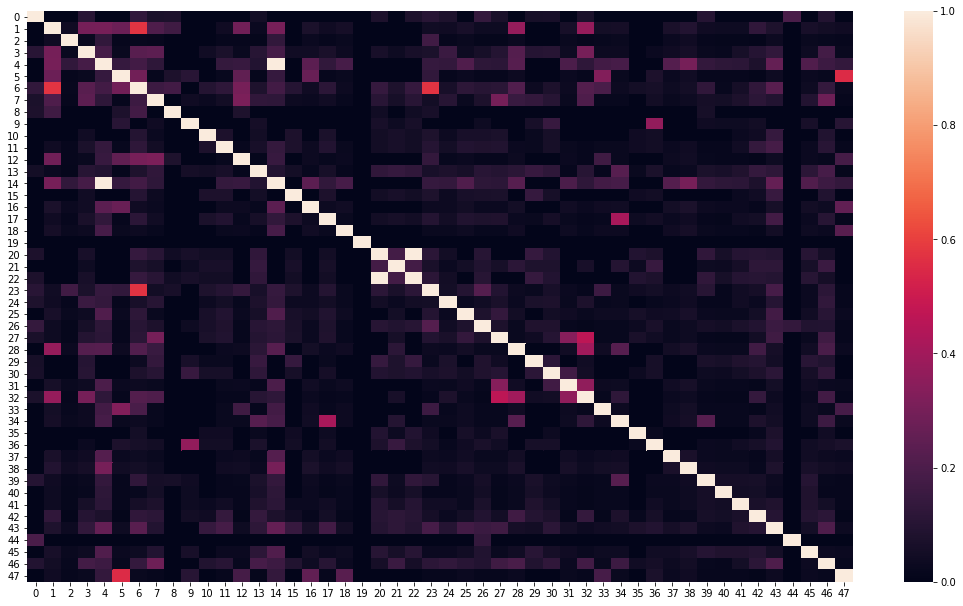

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,1.000000,0.000000,0.000000,0.107361,0.000000,0.000000,0.131720,0.073387,0.075878,0.000000,...,0.000000,0.101175,0.000000,0.000000,0.000000,0.000000,0.193824,0.000000,0.092814,0.000000
1,0.000000,1.000000,0.039801,0.299135,0.304168,0.275905,0.574654,0.204475,0.164785,0.000000,...,0.092258,0.040837,0.035698,0.035259,0.126557,0.078725,0.000000,0.063076,0.047641,0.041078
2,0.000000,0.039801,1.000000,0.023707,0.130851,0.018603,0.022872,0.016205,0.000000,0.000000,...,0.039689,0.017568,0.015357,0.015168,0.010030,0.033867,0.000000,0.027135,0.020495,0.017672
3,0.107361,0.299135,0.023707,1.000000,0.181175,0.025757,0.229392,0.240658,0.000000,0.000000,...,0.054953,0.024324,0.021263,0.059131,0.100595,0.132025,0.000000,0.037571,0.178707,0.024468
4,0.000000,0.304168,0.130851,0.181175,1.000000,0.142165,0.174791,0.123843,0.000000,0.000000,...,0.303313,0.134259,0.117361,0.115921,0.076651,0.258822,0.000000,0.207373,0.156626,0.135051
5,0.000000,0.275905,0.018603,0.025757,0.142165,1.000000,0.292251,0.017606,0.077019,0.108625,...,0.043121,0.019087,0.016685,0.016480,0.010897,0.036795,0.000000,0.029481,0.022267,0.553858
6,0.131720,0.574654,0.022872,0.229392,0.174791,0.292251,1.000000,0.156802,0.172629,0.000000,...,0.053016,0.127385,0.020514,0.057048,0.127098,0.228832,0.000000,0.036247,0.138478,0.023606
7,0.073387,0.204475,0.016205,0.240658,0.123843,0.017606,0.156802,1.000000,0.000000,0.039444,...,0.037563,0.058434,0.051080,0.076516,0.116499,0.090246,0.000000,0.090256,0.278409,0.016725
8,0.075878,0.164785,0.000000,0.000000,0.000000,0.077019,0.172629,0.000000,1.000000,0.000000,...,0.000000,0.059862,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.108625,0.000000,0.039444,0.000000,1.000000,...,0.000000,0.042762,0.037380,0.036921,0.048827,0.000000,0.000000,0.066049,0.000000,0.103190


In [20]:
compare_titles(titles)

In [21]:
print(titles[14])
print(titles[4])

Epistemology
Epistemology


In [22]:
print(titles[6])
print(titles[1])

Epistemology: A Contemporary Introduction to the Theory of Knowledge
Epistemology: A Contemporary Introduction


In [23]:
print(titles[23])
print(titles[6])

The Theory of Knowledge: A Jargon-Free Guide to Epistemology
Epistemology: A Contemporary Introduction to the Theory of Knowledge


In [24]:
print(titles[47])
print(titles[5])

How We Know: Epistemology on an Objectivist Foundation
How Do We Know?: An Introduction to Epistemology


In [25]:
print(titles[19])
print(titles[8])

Nothing & Everything
Knowledge: A Very Short Introduction (Very Short Introductions)


In [26]:
print(titles[41])
print(titles[12])

Southeast Asia's Modern Architecture: Questions of Translation, Epistemology and Power
Introduction to Objectivist Epistemology: Expanded Second Edition


In [30]:
google_results = [
    "Contemporary Debates in Epistemology, 2nd Edition - Wiley\n" +
    "https://www.wiley.com/.../Contemporary+Debates+in+Epistemology%2C+2nd+Editio...\n" +
    "Fully updated with new topics covering the latest developments and debates, the second edition of this highly influential text retains its unique combination of ...",
    "Contemporary debates in epistemology in SearchWorks catalog\n" +
    "https://searchworks.stanford.edu/view/8568473\n" +
    "Contemporary debates in epistemology. Responsibility: edited by Matthias Steup and Ernest Sosa. Imprint: Malden, MA : Blackwell Pub., 2005. Physical ..."
]

google_no_url = [
    "Contemporary Debates in Epistemology, 2nd Edition - Wiley\n" +
    #"https://www.wiley.com/.../Contemporary+Debates+in+Epistemology%2C+2nd+Editio...\n" +
    "Fully updated with new topics covering the latest developments and debates, the second edition of this highly influential text retains its unique combination of ...",
    "Contemporary debates in epistemology in SearchWorks catalog\n" +
    #"https://searchworks.stanford.edu/view/8568473\n" +
    "Contemporary debates in epistemology. Responsibility: edited by Matthias Steup and Ernest Sosa. Imprint: Malden, MA : Blackwell Pub., 2005. Physical ..."
]

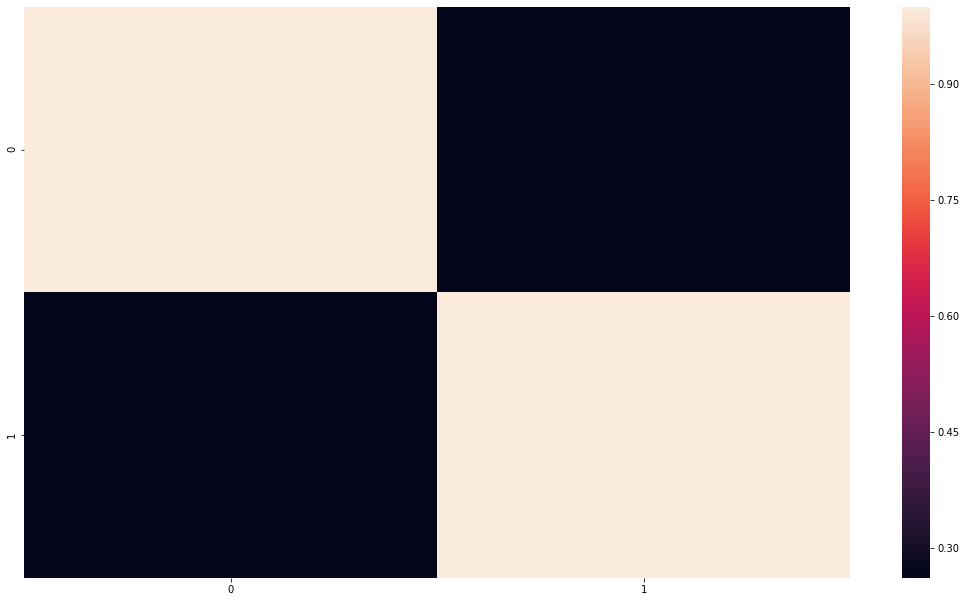

,0,1
0,1.000000,0.260794
1,0.260794,1.000000


In [29]:
compare_titles(google_results)

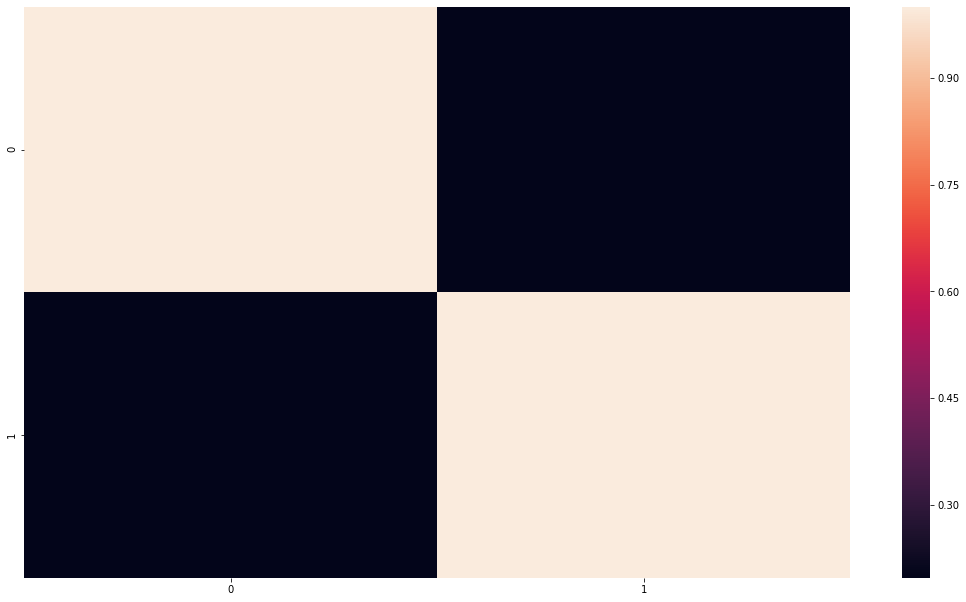

,0,1
0,1.000000,0.196976
1,0.196976,1.000000


In [31]:
compare_titles(google_no_url)